In [18]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

### Step 1: Read and work on `kc_house_data.csv`
- Read the dataset using `pd.read_csv`
- Print the columns of the dataset
- Print the info about the dataset
- Print the description of the dataset features

In [19]:
hdata = pd.read_csv("kc_house_data.csv")

In [20]:
hdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
hdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [24]:
hdata.shape

(21613, 21)

In [27]:
n_rows, n_cols = hdata.shape
n_missing = 50
rand_cols = np.random.randint(0, n_cols, n_missing)
rand_rows = np.random.randint(0, n_rows, n_missing)

# Insert NaNs at the random locations
for row, col in zip(rand_rows, rand_cols):
    hdata.iloc[row, col] = np.nan
    #print(f"the row number is {row} and the column number is {col}")


In [23]:
np.random.randint(0,4,10)

array([3, 1, 1, 2, 0, 3, 0, 3, 0, 3])

In [8]:
# DataFrame dimensions
n_rows, n_cols = hdata.shape

# Number of missing values to insert
n_missing = 50

# Generate random row and column indices
rand_rows = np.random.randint(0, n_rows, n_missing)
rand_cols = np.random.randint(0, n_cols, n_missing)

# Insert NaNs at the random locations
for row, col in zip(rand_rows, rand_cols):
    hdata.iat[row, col] = np.nan

### Step 2: Split the dataset into training and test sets
- Split the dataset, use `random_state=1`
- Check the shape of the train dataset and target set
- Create a scatter plot for the features vs price
- Create a box-plot for the features

In [28]:
y = hdata['price']#hdata.price

In [29]:
X = hdata.drop(['price','id','date','zipcode'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
X_train.shape

(16209, 17)

In [32]:
X_train.iloc[:,0]

8918     3.0
5891     3.0
15604    3.0
5469     3.0
3745     6.0
        ... 
10955    3.0
17289    4.0
5192     3.0
12172    3.0
235      5.0
Name: bedrooms, Length: 16209, dtype: float64

In [14]:
X_train.iloc[1,:]

bedrooms            3.0000
bathrooms           2.5000
sqft_living      2110.0000
sqft_lot         4118.0000
floors              2.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               8.0000
sqft_above       2110.0000
sqft_basement       0.0000
yr_built         1989.0000
yr_renovated        0.0000
lat                47.3878
long             -122.1530
sqft_living15    2110.0000
sqft_lot15       4044.0000
Name: 5891, dtype: float64

In [15]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
8918,3.0,1.00,1010.0,10800.0,1.0,0.0,0.0,4.0,7.0,1010.0,0.0,1972.0,0.0,47.4483,-121.773,1370.0,9500.0
5891,3.0,2.50,2110.0,4118.0,2.0,0.0,0.0,3.0,8.0,2110.0,0.0,1989.0,0.0,47.3878,-122.153,2110.0,4044.0
15604,3.0,3.50,3030.0,11550.0,2.0,0.0,2.0,3.0,8.0,3030.0,0.0,1971.0,2011.0,47.5051,-122.381,2340.0,10560.0
5469,3.0,1.00,1100.0,4600.0,1.0,0.0,0.0,3.0,7.0,1100.0,0.0,1917.0,0.0,47.5686,-122.385,1200.0,5175.0
3745,6.0,2.25,3140.0,10250.0,1.0,0.0,0.0,4.0,8.0,1570.0,1570.0,1959.0,0.0,47.6116,-122.169,2320.0,10250.0


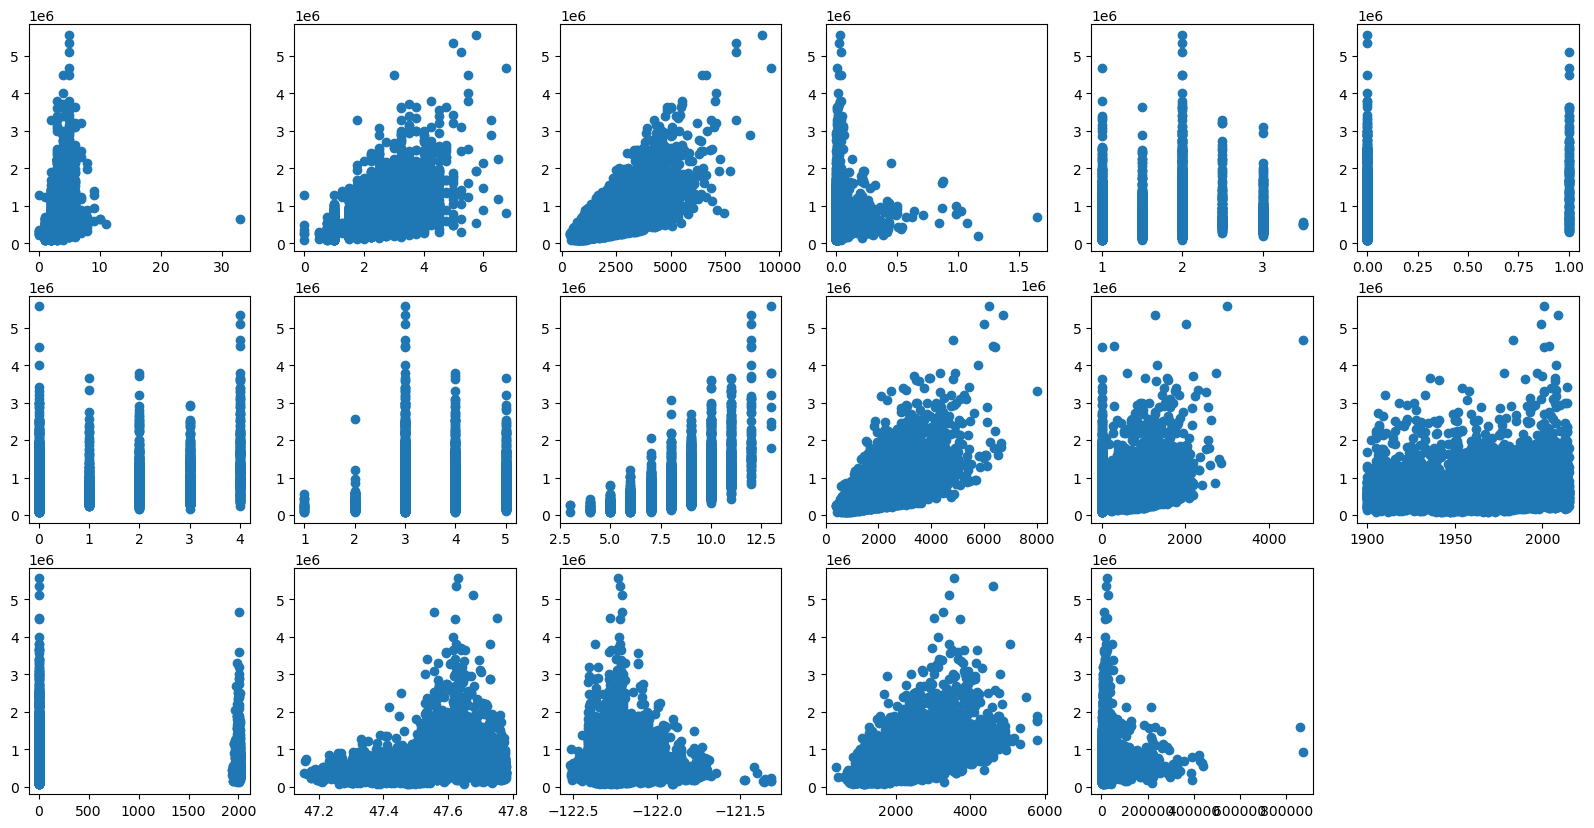

In [33]:
fig, axes = plt.subplots(3,6, figsize=(20,10))

for i ,ax in enumerate(axes.ravel()):
    if i>16:
        ax.set_visible(False)
        break
    X_col = X_train.iloc[:,i]
    ax.scatter(X_col, y_train)
    
    

In [16]:
axes

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

In [17]:
axes[0,0]

<Axes: >

In [18]:
axes.ravel()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

### Step 3: Imputing
- Check the number of missing values for the columns
- Remove rows from df that contain missing values
- Remove columns from df that contain missing values
- Only drop rows where all columns are NaN
- Drop rows that have less than 3 real values
- Only drop rows where NaN appear in specific columns (here `floors`)
- Implement simpleimputer using the strategy of `mean`

In [37]:
X_train.isnull().sum()

bedrooms         0
bathrooms        2
sqft_living      2
sqft_lot         1
floors           0
waterfront       4
view             2
condition        0
grade            2
sqft_above       5
sqft_basement    1
yr_built         1
yr_renovated     6
lat              0
long             0
sqft_living15    3
sqft_lot15       2
dtype: int64

In [38]:
y_train.isnull().sum()

2

In [40]:
y_train.dropna()

8918      290000.0
5891      345950.0
15604     700000.0
5469      450000.0
3745      740000.0
           ...    
10955     571000.0
17289    1350000.0
5192      650000.0
12172     437000.0
235      1025000.0
Name: price, Length: 16207, dtype: float64

In [41]:
X_train.isnull().sum()

bedrooms         0
bathrooms        2
sqft_living      2
sqft_lot         1
floors           0
waterfront       4
view             2
condition        0
grade            2
sqft_above       5
sqft_basement    1
yr_built         1
yr_renovated     6
lat              0
long             0
sqft_living15    3
sqft_lot15       2
dtype: int64

In [43]:
X_train.dropna(subset='sqft_above')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
8918,3.0,1.00,1010.0,10800.0,1.0,0.0,0.0,4.0,7.0,1010.0,0.0,1972.0,0.0,47.4483,-121.773,1370.0,9500.0
5891,3.0,2.50,2110.0,4118.0,2.0,0.0,0.0,3.0,8.0,2110.0,0.0,1989.0,0.0,47.3878,-122.153,2110.0,4044.0
15604,3.0,3.50,3030.0,11550.0,2.0,0.0,2.0,3.0,8.0,3030.0,0.0,1971.0,2011.0,47.5051,-122.381,2340.0,10560.0
5469,3.0,1.00,1100.0,4600.0,1.0,0.0,0.0,3.0,7.0,1100.0,0.0,1917.0,0.0,47.5686,-122.385,1200.0,5175.0
3745,6.0,2.25,3140.0,10250.0,1.0,0.0,0.0,4.0,8.0,1570.0,1570.0,1959.0,0.0,47.6116,-122.169,2320.0,10250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,3.0,2.50,1920.0,3867.0,2.0,0.0,0.0,3.0,8.0,1920.0,0.0,2005.0,0.0,47.5538,-121.994,2190.0,3841.0
17289,4.0,4.50,3420.0,7440.0,3.0,0.0,0.0,3.0,9.0,3420.0,0.0,2014.0,0.0,47.6875,-122.330,1360.0,5580.0
5192,3.0,1.75,1970.0,54450.0,1.0,0.0,0.0,3.0,8.0,1570.0,400.0,1980.0,0.0,47.5936,-122.012,2460.0,36677.0
12172,3.0,2.25,1980.0,8775.0,1.0,0.0,0.0,3.0,7.0,1290.0,690.0,1959.0,0.0,47.7753,-122.359,1550.0,9240.0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16209 entries, 8918 to 235
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16209 non-null  float64
 1   bathrooms      16207 non-null  float64
 2   sqft_living    16207 non-null  float64
 3   sqft_lot       16208 non-null  float64
 4   floors         16209 non-null  float64
 5   waterfront     16205 non-null  float64
 6   view           16207 non-null  float64
 7   condition      16209 non-null  float64
 8   grade          16207 non-null  float64
 9   sqft_above     16204 non-null  float64
 10  sqft_basement  16208 non-null  float64
 11  yr_built       16208 non-null  float64
 12  yr_renovated   16203 non-null  float64
 13  lat            16209 non-null  float64
 14  long           16209 non-null  float64
 15  sqft_living15  16206 non-null  float64
 16  sqft_lot15     16207 non-null  float64
dtypes: float64(17)
memory usage: 2.2 MB


In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(strategy='mean')

In [47]:
X_train_im = imputer.fit_transform(X_train)

In [48]:
X_test_im = imputer.transform(X_test)

### Step 4: Scaling
- Scale the train dataset using `StandarScaler`
- Fit the `RidgeCV()` with cross validation (cv=10) to the training dataset. Import `RidgeCV` from `sklearn.linear_model`
- Check the mean and standard deviation of the scores.
- Repeat cross validation for scaled dataset. Do you see any difference?

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
ridge = RidCV()
ridge.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

### Step 5:
Repeat Step 5 using `KNeighborsRegressor`.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
ridge = RidCV()
ridge.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

# Pipelines

### Step 1: Scaling without Pipeline
- Split the dataset into train and test datasets
- Scale the train dataset
- Fit the scaled dataset with `Ridge()`
- Scale the test dataset
- Print the score for the scaled test dataset

In [48]:
pipe2 = Pipeline(steps=[('scaler', StandardScaler()),
               ('knn', KNeighborsRegressor())])

In [49]:
pipe2.steps

[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())]

In [ ]:
myparams = {'knn__n_neighbors': np.arange(1,13,2)}

### Step 2: 
Repeat Step 1 using `make_pipeline`

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
pipe1 = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [45]:
pipe1

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [46]:
pipe1.steps

[('standardscaler', StandardScaler()),
 ('kneighborsregressor', KNeighborsRegressor())]

In [ ]:
myparams = {'kneighborsegressor__n_neighbors': np.arange(1,13,2)}
GridSearchCV(pipe1,param_grid = myparams, cv=10 )

### Step 3:
- Create a pipeline of `StandardScaler()`, `KNeighborsRegressor()`., You can use either `Pipeline` or `make_pipeline`
- Create a grid search for number of reigbors for `KNeighborsRegressor()`. Change the neighbors from 1 to 10.
- Fit the grid on the train dataset
- Print the test score.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [53]:
y_train.isnull().sum()

2

In [54]:
y_train[y_train.isnull()==True]

17111   NaN
19747   NaN
Name: price, dtype: float64

In [57]:
missing_index = y_train[y_train.isnull()==True].index.tolist()

In [58]:
missing_index

[17111, 19747]

In [68]:
X_train.loc[missing_index]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
17111,3.0,1.75,1580.0,6099.0,1.0,0.0,0.0,5.0,7.0,790.0,790.0,1944.0,0.0,47.4807,-122.290,1330.0,6099.0
19747,3.0,2.50,2390.0,1984.0,2.0,0.0,0.0,3.0,8.0,2220.0,170.0,2008.0,0.0,47.5405,-122.027,2150.0,1984.0


In [70]:
X_train.shape

(16209, 17)

In [71]:
X_train.drop(missing_index, axis=0, inplace=True)

In [72]:
X_train.shape

(16207, 17)

In [73]:
y_train.shape

(16209,)

In [74]:
y_train.dropna(inplace=True)

In [75]:
y_train.shape

(16207,)

In [50]:
pipe3 = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('knnr', KNeighborsRegressor())])

In [51]:
pipe3

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('knnr', KNeighborsRegressor())])

In [76]:
pipe3.fit(X_train, y_train)
pipe3.score(X_train, y_train)

0.864994688807027

In [79]:
y_test.isnull().sum()

1

In [80]:
missin_index_t = y_test[y_test.isnull()==True].index.tolist()

In [81]:
y_test.dropna(inplace=True)

In [83]:
X_test.drop(missin_index_t, axis=0, inplace=True)

In [84]:
pipe3.score(X_test, y_test)

0.776053387875864

In [90]:
myparams = {'knnr__n_neighbors':np.arange(1,13,2)}

In [91]:
mygrid  = GridSearchCV(pipe3,param_grid = myparams, cv=10)

In [92]:
mygrid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('knnr', KNeighborsRegressor())]),
             param_grid={'knnr__n_neighbors': array([ 1,  3,  5,  7,  9, 11])})

In [93]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('knnr', KNeighborsRegressor())]),
             param_grid={'knnr__n_neighbors': array([ 1,  3,  5,  7,  9, 11])})

In [94]:
mygrid.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('knnr', KNeighborsRegressor(n_neighbors=9))])

In [96]:
pipe_best = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('knnr', KNeighborsRegressor(n_neighbors=9))])

In [98]:
pipe_best.fit(X_train, y_train)
print(pipe_best.score(X_train, y_train))
print(pipe_best.score(X_test, y_test))

0.8345553493088205
0.7702356044599978
